## Setup

In [24]:
import numpy as np
import pandas as pd
import faker
import plotly.express as px
import plotly.figure_factory as ff
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('plotting.backend', 'plotly')
FAKE = faker.Faker(seed=42)

In [53]:
def test(x, min_x=None):
    min_x = min_x or min(0, x.min() - 1)
    max_x = max_x or max(0, x.max() + 1)
        
x = np.array([1, 2, 3])
for t in [1]:
    print(test(x, None))

0


In [26]:
def absolute_deviation(s: pd.Series) -> pd.Series:
    return (s - s.mean()).abs()


def number_line(x, xlabel=None, min_x=None, max_x=None):
    # set x-axis limits, if not provided defaults to min/max of x, with 1 unit padding
    # and 0 as the min/max (if all positive/negative)
    min_x = min_x or min(0, x.min() - 1)
    max_x = max_x or max(0, x.max() + 1)
    
    plt.figure(figsize=(10, 0.5))
    ax = plt.subplot(1, 1, 1)
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    
    for spine in ax.spines.values():
        if spine.spine_type != 'bottom': # keep bottom spine visible
            spine.set_visible(False)

    ax.set_xlim(min_x, max_x)
    ax.set_ylim(0, 1)
    
    # plot x values & label xaxis (if provided)
    y = np.array([0.25] * x.shape[0]) # height of x above number line
    ax.plot(x, y, 'ro', markersize=2.5, alpha=0.25)
    ax.set_xlabel(xlabel)

    # plot & label x mean
    avg_x = x.mean()

    # plot a line from the mean to the number line
    ax.plot([avg_x, avg_x], [0.5, 0], 'b--', linewidth=5)
    ax.annotate(text=f'arithmetic mean = {avg_x:.2f}', xy=(avg_x, 0.5), ha='center', va='bottom')


# TODO alter y values to make them more interesting
# stack points on top of each other if they are the same
# new = [0.25] * len(x)
# x = sorted(x)
# for i in range(len(x)):
#     if i == 0:
#         continue
#     if round(x[i], 2) == round(x[i-1], 2):
#         new[i] = ((new[i-1] + new[i-2]) / 2) + 1
# y = new

## Types of Statistics

### Descriptive Statistics
Meaningfully describe, show, or summarize data for patterns to emerge and include measures of central tendency (mean, median, mode) and measures of variability (range, variance, standard deviation, mean absolute deviation, quartiles, percentiles, and interquartile range).

- Do not allow for conclusions beyond the data analysed, though can help us choose statistical tools for further analysis.
- Inferential statistics are required to draw conclusions from the data.

### Inferential Statistics
Allow us to generalise from sample data to the wider population (from which the sample was selected). Inferential statistics are used to:

- test hypotheses
- estimate population parameters
- make predictions about the future
- determine whether study results are statistically significant

Inferential statistics include hypothesis testing, confidence intervals, and prediction intervals.
- Hypothesis testing (statistical method used in making decisions using data analysis):
    - makes an assumption about a population parameter (null hypothesis) and compares it to our alternative assumption (the claim being tested)
    - the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups.=
    - The alternative hypothesis is an assumption that there is a relationship between two measured phenomena, or an association among groups
    - A p-value is the probability of obtaining test results at least as extreme as the results observed, assuming that the null hypothesis is correct
- A confidence interval is an estimate computed from statistics of observed data, providing a range of values likely to contain the true value of an unknown population parameter
- Similarly a prediction interval is a range of values likely to contain the true value of an unknown future observation

### Measures of Central Tendency

In [57]:
data = {
    'name': [FAKE.name() for _ in range(100)],
    'income': [FAKE.random_int(min=0, max=100000) for _ in range(100)],
}

df = pd.DataFrame(data)
df.head()

,name,income
0,Morgan Bryan,96229
1,Joseph Young,63130
2,Paul Patel,50543
3,Zachary Harris,56495
4,Roger Williams,81402


In [58]:
df.agg({'income': ['mean', 'median']}).T.astype(int)

,mean,median
income,49905,49830


In [59]:
new_row = pd.DataFrame({'name': ['Elon Musk'], 'income': [40_000_000_000]})
new_df = pd.concat([df, new_row], ignore_index=True)
new_df.agg({'income': ['mean', 'median']}).T.astype(int)

,mean,median
income,396089015,49886


## Logarithms

### [Introduction to Logarithms](https://www.mathsisfun.com/algebra/logarithms.html)

In [60]:
# with base investment of $5 and 5x return, how many years will it take to reach $125?
base = 5
investment = 125
print(int(np.log(investment) / np.log(base)))
print([5**i for i in range(1, 4)])

3
[5, 25, 125]


In [61]:
# log is the inverse of exponentiation
print(
    f'log10(10) = {np.log10(10)}'
    , f'log10(100) = log10(10^2) = 2log10(10) = {np.log10(100)}'
    , f'log10(1000) = log10(10^3) = 3log10(10) = {np.log10(1000)}'
    , sep='\n'
)

log10(10) = 1.0
log10(100) = log10(10^2) = 2log10(10) = 2.0
log10(1000) = log10(10^3) = 3log10(10) = 3.0


### Visualising data

In [62]:
data = {
    'company': ['Tesla ', 'UBER', 'Amazon', 'Jindal  Steel', 'Axis Bank', 'Vedanta']
    , 'revenue': [31.0, 11.0, 386.0, 4.7, 5.6, 11.3]
}

df = pd.DataFrame(data)
df.plot(kind='bar', x='company', y='revenue').update_layout(yaxis_title='Revenue in $Bn', xaxis_title='Company')

In [33]:
# using log scale for y-axis, to better visualize the difference in revenue (can better compare non-amazon companies)
df.plot(kind='bar', x='company', y='revenue', log_y=True).update_layout(yaxis_title='Revenue in $Bn', xaxis_title='Company')

### Log Transformation in ML

Classic example is the Richter scale, whereby an earthquake measured at 5.0 is 10 times more powerful than one measured at 4.0. This is because the Richter scale is logarithmic.

In [63]:
# bring the values into a more comparable (log) scale, especially import when comparing values of different orders of magnitude
df.assign(log_revenue=np.log10(df['revenue']))

,company,revenue,log_revenue
0,Tesla,31.0,1.491362
1,UBER,11.0,1.041393
2,Amazon,386.0,2.586587
3,Jindal Steel,4.7,0.672098
4,Axis Bank,5.6,0.748188
5,Vedanta,11.3,1.053078


## Standard Deviation and Mean Absolute Deviation

### Introduction to [MAD](https://www.mathsisfun.com/data/mean-deviation.html) and [STD](https://www.mathsisfun.com/data/standard-deviation.html)
#### In Machhine Learning:
- MAD is to L1 Norm / Manhattan Distance / Mean Absolute Error (MAE)
- as STD is to L2 Norm / Euclidean Distance / Root Mean Squared Error (RMSE)

#### Quick Aside:
- MAE is the average of the absolute differences between predicted and actual values
- RMSE is the square root of the average of the squared differences between predicted and actual values

#### L-Norm [examples](https://montjoile.medium.com/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c)
- L0 Norm (not actually a norm) is the number of non-zero elements in a vector
- L1 Norm is the sum of the absolute values of elements in a vector
- L2 Norm is the square root of the sum of the squared values elements in a vector
- L∞ Norm is the maximum absolute value of the vector elements

,mean_absolute_deviation
maths,8.227945
history,0.765550


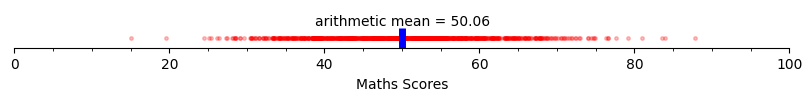

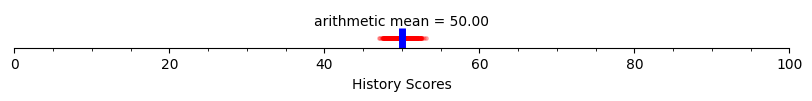

In [66]:
data = {
    'maths': np.random.normal(loc=50, scale=10, size=1_000).clip(0, 100)
    , 'history': np.random.normal(loc=50, scale=1, size=1_000).clip(0, 100)
}
df = pd.DataFrame(data)

# we can see from the chart and MAD, that the maths scores are more spread out than the history scores
number_line(df['maths'], xlabel='Maths Scores', min_x=0, max_x=100)
number_line(df['history'], xlabel='History Scores', min_x=0, max_x=100)
df.pipe(absolute_deviation).mean().to_frame('mean_absolute_deviation')

### What if our MAD is very similar?

,maths,history
mean_absolute_deviation,3.0,3.0
standard_deviation,4.0,4.0


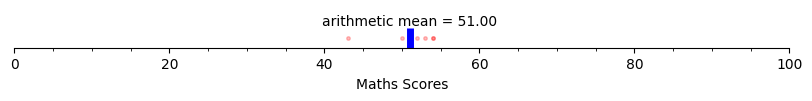

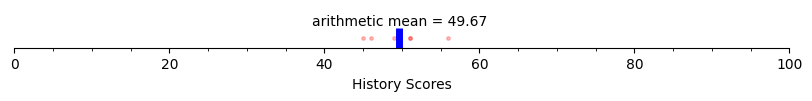

In [130]:
data = {'maths': [43, 52, 54, 50, 53, 54], 'history': [46, 51, 51, 49, 45, 56]}
df = pd.DataFrame(data)


number_line(df['maths'], xlabel='Maths Scores', min_x=0, max_x=100)
number_line(df['history'], xlabel='History Scores', min_x=0, max_x=100)

(
    df
    .pipe(absolute_deviation)
    .mean()
    .to_frame('mean_absolute_deviation')
    .join( df.std(ddof=1).to_frame('standard_deviation') )
    .round()
    .T
)

## Normal/Gaussian Distribution & Z-Score

### Introduction to [Normal Distribution](https://www.mathsisfun.com/data/standard-normal-distribution.html) and [Z-Score](https://www.mathsisfun.com/definitions/z-score.html)

#### Common Practices
- Z-Score Normalisation: data so that it has a mean of 0 and a standard deviation of 1
- Z-Score is simply the number of standard deviations away from the mean that data points are
- Data points falling 3 standard deviations from the mean are considered outliers

In [37]:
data = {
    'name': [FAKE.first_name() for _ in range(1000)]
    , 'height_ft': np.random.normal(loc=5.25, scale=0.5, size=1000).clip(4, 6.5).round(1)
}
df = pd.DataFrame(data)
df.head(3)

,name,height_ft
0,Olivia,5.1
1,Juan,5.2
2,Phillip,6.0


In [38]:
df.plot(
    kind='hist'
    , x='height_ft'
    , marginal='violin'
).update_layout(
    title='Height Distribution'
    , xaxis_title='Height (ft)'
    , yaxis_title='Frequency'
    , bargap=0.1
    , title_x=0.5
)

In [39]:
col = 'height_ft'
hist_data = [df[col]]
group_labels = [col]
bin_size = [0.1] # can have different sizes for each bin
colors=['green'] # can have different colors for each bin

ff.create_distplot(
    hist_data=hist_data
    , group_labels=group_labels
    , bin_size=bin_size
    , colors=colors
    , curve_type='normal' # 'kde' or 'normal'
).update_layout(   
    title='Height Distribution' 
    , xaxis_title='Height (ft)'
    , yaxis_title='Frequency'
    , bargap=0.1
    , title_x=0.5
)

### xxx to [MAD](https://www.mathsisfun.com/data/mean-deviation.html) and [STD](https://www.mathsisfun.com/data/standard-deviation.html)

In [40]:
df = pd.read_parquet('../data/weight_height.parquet', columns=['weight'])
df

FileNotFoundError: [Errno 2] No such file or directory: '../data/weight_height.parquet'

In [ ]:
# https://www.youtube.com/watch?v=xtTX69JZ92w&list=PLeo1K3hjS3uuKaU2nBDwr6zrSOTzNCs0l&index=7

In [ ]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['col1', 'col2', 'col3'])

In [ ]:
df.sort_values(by='col1', ascending=False)

ValueError: The column label 'col1' is not unique.
For a multi-index, the label must be a tuple with elements corresponding to each level.

In [ ]:
### Normal Distribution and Z-Scores
- https://www.youtube.com/watch?v=okhrFgaUwio